In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials import mnist
from IPython.display import display, HTML
import matplotlib.pyplot as plt


In [3]:
mnist_data = mnist.input_data.read_data_sets('/data/mnist', one_hot=True) # one_hot 是 y是否one-hot表示

W0924 16:32:50.322103 140294744270656 deprecation.py:323] From <ipython-input-3-3bb742cec026>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0924 16:32:50.331631 140294744270656 deprecation.py:323] From /work/anaconda3/envs/ai/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0924 16:32:50.430320 140294744270656 deprecation.py:323] From /work/anaconda3/envs/ai/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is depr

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /data/mnist/train-images-idx3-ubyte.gz


W0924 16:33:06.260242 140294744270656 deprecation.py:323] From /work/anaconda3/envs/ai/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0924 16:33:06.266845 140294744270656 deprecation.py:323] From /work/anaconda3/envs/ai/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /data/mnist/t10k-images-idx3-ubyte.gz


W0924 16:33:09.736088 140294744270656 deprecation.py:323] From /work/anaconda3/envs/ai/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
display('train image shape:')
display(mnist_data.train.images.shape)
display('label y shape')
display(mnist_data.train.labels.shape)

'train image shape:'

(55000, 784)

'label y shape'

(55000, 10)

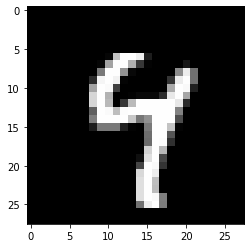

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [6]:
# 从上面可以看出一个image是 1*784的一维向量, label是10个分类中的一个
# 再来看看一个图像究竟是张的什么样子

def plot_mnist(image_array):
    """
    根据手写识别的数组来进行输出最终的手写识别图片
    :param image_array: 手写识别m*n数组
    :return:
    """

    fig = plt.figure()
    plt.imshow(image_array, cmap='gray')
    plt.show()

image_index = 2 # 取第一章图片看看
image = mnist_data.train.images[image_index]
image = image.reshape(28, 28)

plot_mnist(image)

# 看看label
display(mnist_data.train.labels[image_index])

In [10]:
# 1. 创建place_holder
batch_size = 128 # 每次放入128个图片进行训练
image_shape = 784
label_shape = 10

X = tf.placeholder(tf.float32, [batch_size, image_shape], name='X')
Y = tf.placeholder(tf.float32, [batch_size, label_shape], name='Y')

# 2 创建权重和参数变量
w = tf.Variable(tf.random_normal(shape=(image_shape, label_shape), stddev=0.01), name='weight')
b = tf.Variable(tf.zeros([1, 10]), name='bias')

# X*w + b = label  所以, 每一个x.shape=1*784, w = 784*10.

# 3 前向函数
logit = tf.matmul(X, w) + b

# 4 loss 函数
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=Y, name='loss')
loss = tf.reduce_mean(entropy)

# 5 准备优化器
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)



epoch_num = 50 # 训练50轮

with tf.Session() as session:

    writer = tf.summary.FileWriter('./graph/softmax', session.graph)

    session.run(tf.global_variables_initializer())

    n_batches = int(mnist_data.train.num_examples / batch_size)

    for i in range(epoch_num):
        total_loss = 0 
        for _ in range(n_batches):
            X_batch, Y_batch = mnist_data.train.next_batch(batch_size)

            _, l = session.run([optimizer, loss], 
                               feed_dict={X: X_batch, Y: Y_batch})

            total_loss += l
        print ('epoch[%d]: Average loss: %f' % (i, total_loss/n_batches))

        
    # 构建预测图
    pred = tf.nn.softmax(logit)
    correct_preds = tf.equal(tf.arg_max(pred, 1), tf.arg_max(Y, 1))

    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

    test_n_batches = int(mnist_data.test.num_examples / batch_size)

    total_pred_correct = 0
    for i in range(test_n_batches):
        X_batch_test, Y_batch_test = mnist_data.test.next_batch(batch_size)
        accuracy_batch = session.run([accuracy], 
                                     feed_dict={X: X_batch_test,
                                                Y: Y_batch_test})
        total_pred_correct += accuracy_batch[0]

    print ('Accuracy: %f' % (total_pred_correct / mnist_data.test.num_examples))

    writer.close()


epoch[0]: Average loss: 0.367622
epoch[1]: Average loss: 0.294849
epoch[2]: Average loss: 0.283259
epoch[3]: Average loss: 0.278080
epoch[4]: Average loss: 0.274398
epoch[5]: Average loss: 0.272623
epoch[6]: Average loss: 0.268660
epoch[7]: Average loss: 0.269568
epoch[8]: Average loss: 0.266202
epoch[9]: Average loss: 0.265703
epoch[10]: Average loss: 0.265389
epoch[11]: Average loss: 0.263992
epoch[12]: Average loss: 0.264202
epoch[13]: Average loss: 0.258923
epoch[14]: Average loss: 0.261778
epoch[15]: Average loss: 0.258597
epoch[16]: Average loss: 0.258555
epoch[17]: Average loss: 0.256601
epoch[18]: Average loss: 0.253446
epoch[19]: Average loss: 0.259059
epoch[20]: Average loss: 0.256029
epoch[21]: Average loss: 0.254039
epoch[22]: Average loss: 0.256295
epoch[23]: Average loss: 0.254212
epoch[24]: Average loss: 0.253880
epoch[25]: Average loss: 0.253731
epoch[26]: Average loss: 0.253134
epoch[27]: Average loss: 0.252340
epoch[28]: Average loss: 0.250974
epoch[29]: Average loss:

W0924 16:53:48.551287 140294744270656 deprecation.py:323] From <ipython-input-10-ff31dcecb8fc>:52: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


epoch[49]: Average loss: 0.250773
Accuracy: 0.917500
